<a href="https://colab.research.google.com/github/nhanguyene/HOMEWORK_AI_21_05_22/blob/main/CNN_Detect_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
from keras.datasets import mnist
from sklearn import utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import RMSprop,Adam
import numpy as np
from keras.utils import np_utils
import pandas as pd
from keras.callbacks import EarlyStopping 
import matplotlib.pyplot as plt

In [2]:
#Import dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#Set data type
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

x_train/=255
x_test/=255

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)


In [4]:
#Create model for train
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),input_shape=(28,28),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [5]:
#Compile and Training
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,validation_data=(x_test,y_test),callbacks=[EarlyStopping(monitor='val_loss',patience=20)])

Epoch 1/500
469/469 [==============================] - 85s 180ms/step - loss: 0.2003 - accuracy: 0.9428 - val_loss: 0.0754 - val_accuracy: 0.9761
Epoch 2/500
469/469 [==============================] - 81s 172ms/step - loss: 0.0530 - accuracy: 0.9843 - val_loss: 0.0566 - val_accuracy: 0.9819
Epoch 3/500
469/469 [==============================] - 88s 189ms/step - loss: 0.0373 - accuracy: 0.9881 - val_loss: 0.0344 - val_accuracy: 0.9887
Epoch 4/500
469/469 [==============================] - 83s 177ms/step - loss: 0.0278 - accuracy: 0.9910 - val_loss: 0.0339 - val_accuracy: 0.9883
Epoch 5/500
469/469 [==============================] - 83s 176ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0239 - val_accuracy: 0.9925
Epoch 6/500
469/469 [==============================] - 82s 174ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.0302 - val_accuracy: 0.9897
Epoch 7/500
469/469 [==============================] - 82s 175ms/step - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.0259 -

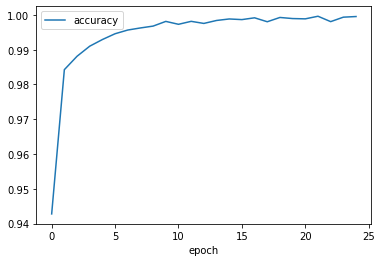

Test error: 0.03459727764129639
Test accuracy:  0.9936000108718872


In [6]:
#Draw plot and make evaluate
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test error:',score[0])
print('Test accuracy: ',score[1])

Index ? 35
(10000, 28, 28, 1)
Predicted value:  2
Correct value:  2


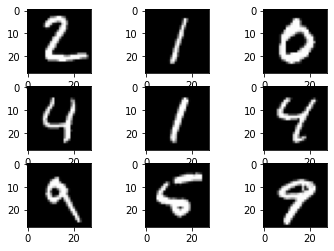

In [7]:
#Make test and predict
n=int(input("Index ? "))
print(x_test.shape)

y_predict = model.predict(x_test[n].reshape(1,28,28,1))
print('Predicted value: ', np.argmax(y_predict))
print('Correct value: ',np.argmax(y_test[n]))

(x_tr,y_tr),(x_t,y_t)=mnist.load_data()
for i in range(1,10):
  plt.subplot(330+i)
  plt.imshow(x_t[i],cmap='gray')